center of mass for a system of particles
---

$R=\frac{1}{M}\sum_{i=1}^n{m_i r_i}$

- R: center of mass
- M: sum of all masses



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if 0:
    r_3d,m1,m2,x,y,z,vx,vy,vz,v_r,v_theta,v_phi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz,v_r,v_theta,v_phi=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz,v_r,v_theta,v_phi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
m_ges=m1+m2

In [4]:
#calculate the center of mass R 
R_x=np.sum(m_ges*x)/np.sum(m_ges)
R_y=np.sum(m_ges*y)/np.sum(m_ges)
R_z=np.sum(m_ges*z)/np.sum(m_ges)
R_vector=np.array([[R_x],[R_y],[R_z]])
R_vecabs=np.sqrt(R_x**2+R_y**2+R_z**2) #radial distance to center of coordinate system

In [5]:
print('R_vector='+str(R_vector), 'R_absvector='+str(R_vecabs))

R_vector=[[-0.00880153]
 [ 0.00221846]
 [-0.00226683]] R_absvector=0.00935559154689


In [6]:
print(x[0],y[0],z[0], r_3d[0])
#the center of mass is neither (0,0,0) nor the position of the black hole 

6.80381e-05 0.000202856 4.48005e-05 0.000218602


sectional densitiy profiles
===

center = center of mass (see above)
---

In [7]:
#in Scheiben um Achsen um  center of mass punkt 
x0=R_vector[0] #x component of center of mass
y0=R_vector[1] #y component of center of mass
z0=R_vector[2] #z component of center of mass

d=1 #kpc; just chose a random value

xy_level=np.array([[x],[y],[z[np.abs(z-z0)<=d]]])
xz_level=np.array([[x],[y[np.abs(y-y0)<=d]],[z]])
yz_level=np.array([[x[np.abs(x-x0)<=d]],[y],[z]])

In [8]:
m_xy=m_ges[np.abs(z-z0)<=d]
m_xz=m_ges[np.abs(y-y0)<=d]
m_yz=m_ges[np.abs(x-x0)<=d]
print(len(m_xy),len(m_xz), len(m_yz))
print(np.sum(m_xy),np.sum(m_xz),np.sum(m_yz))

273321 273609 273693
108177.278498 108209.491365 108251.82628


Die Massen der Sterne unterscheiden sich bei 0.5 kpc um 1/1000, bei 1kpc sogar noch weniger.

In [9]:
x_new=x-x0 #distance to center of mass in x direction
y_new=y-y0 #distance to center of mass in y direction
z_new=z-z0 #distance to center of mass in z direction
r_3d_new=r_3d-R_vecabs #distance to center of mass in radial direction

#creating arrays for positive and negative values of x y z distances
x_pos=np.ma.getmask(np.ma.masked_greater_equal(x_new, 0))
x_neg=np.ma.getmask(np.ma.masked_less_equal(x_new, 0))
y_pos=np.ma.getmask(np.ma.masked_greater_equal(y_new, 0))
y_neg=np.ma.getmask(np.ma.masked_less_equal(y_new, 0))
z_pos=np.ma.getmask(np.ma.masked_greater_equal(z_new, 0))
z_neg=np.ma.getmask(np.ma.masked_less_equal(z_new, 0))

#splitting in octants
oct1=x_pos*y_pos*z_pos
oct2=x_neg*y_pos*z_pos
oct3=x_neg*y_neg*z_pos
oct4=x_pos*y_neg*z_pos
oct5=x_pos*y_pos*z_neg
oct6=x_neg*y_pos*z_neg
oct7=x_neg*y_neg*z_neg
oct8=x_pos*y_neg*z_neg




In [10]:
#density profiles of octants
r0=0.1
step=20
end=105
stepsize=((np.log10(end)-np.log10(r0))/step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_anf=r_3d_new<r0
r_i=r[:-1:]
r_a=r[1::]

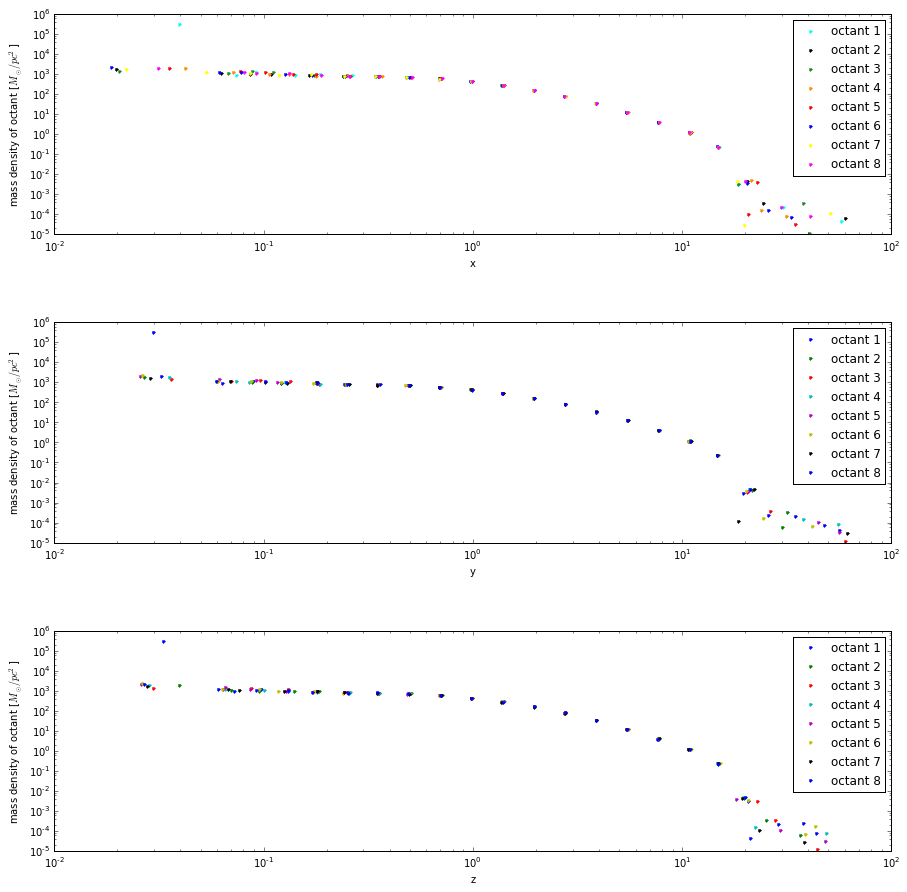

In [33]:
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(15,15))
for k in range(8):#choose a different octant for every k
    if k==0:
        octa=oct1
    elif k==1:
        octa=oct2
    elif k==2:
        octa=oct3
    elif k==3:
        octa=oct4
    elif k==4:
        octa=oct5
    elif k==5:
        octa=oct6
    elif k==6:
        octa=oct7
    elif k==7:
        octa=oct8
    
    x_neu=np.zeros(step) #creates x,y,z,M,rho arrays 
    y_neu=np.zeros(step)
    z_neu=np.zeros(step)
    M=np.zeros(step)
    rho=np.zeros(step)
    
    for n in range(step): #binning
        inbin=(r_i[n]<r_3d_new)*(r_3d_new<=r_a[n]) #checks if distance is inside range of bin
        M[n]=np.sum(m1[inbin*octa])+np.sum(m2[inbin*octa]) #sums up masses of stars in bin and octant
        rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates mass density
        x_neu[n]=np.mean(x_new[inbin*octa])#calculates mean distance in x direction of stars in bin and octant
        y_neu[n]=np.mean(y_new[inbin*octa])
        z_neu[n]=np.mean(z_new[inbin*octa])
        
    M_extra=np.sum(m1[r_anf*octa])+np.sum(m2[r_anf*octa])#sums up mass of stars which distances are less than first binning distance
    rho_extra=M_extra/(r0**2*np.pi)#calculates mass density for these stars
    x_extra=np.mean(x_new[r_anf*octa]) #calculates mean distance in x direction of these stars
    y_extra=np.mean(y_new[r_anf*octa])
    z_extra=np.mean(z_new[r_anf*octa])
    
    M_final=np.insert(M,0,M_extra)
    rho_final=np.insert(rho,0,rho_extra)
    x_final=np.insert(x_neu,0,x_extra)
    y_final=np.insert(y_neu,0,y_extra)
    z_final=np.insert(z_neu,0,z_extra)
    
    lab='octant '+str(k+1)
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta'] #since there are 7(without white) standard colors we need at least one extra color

    #plots density profiles of all octants for each direction
    axes[0].loglog(np.abs(x_final),rho_final,'.',color=colors[k],label=lab)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
    axes[0].legend(numpoints=1)
    axes[1].loglog(np.abs(y_final),rho_final,'.',c=colors[k],label=lab)
    axes[1].set_xlabel('y')
    axes[1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
    axes[1].legend(numpoints=1)
    axes[2].loglog(np.abs(z_final),rho_final,'.',c=colors[k],label=lab)
    axes[2].set_xlabel('z')
    axes[2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
    axes[2].legend(numpoints=1)
    
fig.subplots_adjust(hspace=0.4)

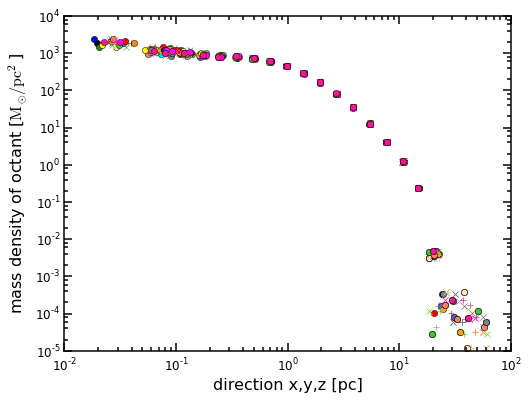

In [17]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for k in range(8): #choose a different octant for every k
    if k==0:
        octa=oct1
    elif k==1:
        octa=oct2
    elif k==2:
        octa=oct3
    elif k==3:
        octa=oct4
    elif k==4:
        octa=oct5
    elif k==5:
        octa=oct6
    elif k==6:
        octa=oct7
    elif k==7:
        octa=oct8
    
    x_neu=np.zeros(step) #creates x,y,z,M,rho arrays 
    y_neu=np.zeros(step)
    z_neu=np.zeros(step)
    M=np.zeros(step)
    rho=np.zeros(step)
    
    for n in range(step): #binning
        inbin=(r_i[n]<r_3d_new)*(r_3d_new<=r_a[n]) #checks if distance is inside range of bin
        M[n]=np.sum(m1[inbin*octa])+np.sum(m2[inbin*octa]) #sums up masses of stars in bin and octant
        rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates mass density
        x_neu[n]=np.mean(x_new[inbin*octa]) #calculates mean distance in x direction of stars in bin and octant
        y_neu[n]=np.mean(y_new[inbin*octa])
        z_neu[n]=np.mean(z_new[inbin*octa])
        
    M_extra=np.sum(m1[r_anf*octa])+np.sum(m2[r_anf*octa]) #sums up mass of stars which distances are less than first binning distance
    rho_extra=M_extra/(r0**2*np.pi) #calculates mass density for these stars
    x_extra=np.mean(x_new[r_anf*octa]) #calculates mean distance in x direction of these stars
    y_extra=np.mean(y_new[r_anf*octa])
    z_extra=np.mean(z_new[r_anf*octa])
    
    M_final=np.insert(M,0,M_extra) 
    rho_final=np.insert(rho,0,rho_extra)
    x_final=np.insert(x_neu,0,x_extra)
    y_final=np.insert(y_neu,0,y_extra)
    z_final=np.insert(z_neu,0,z_extra)
    
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta'] #since there are 7(without white) standard colors we need at least one extra color

    #plots density profiles of all directions and octants in one plot, different markers for different directions
    ax.loglog(np.abs(x_final),rho_final,color=colors[k],marker='o',linestyle='None',label='oct '+str(k+1)+" in x")
    ax.loglog(np.abs(y_final),rho_final,color=colors[k],marker='x',linestyle='None',label='oct '+str(k+1)+" in y")
    ax.loglog(np.abs(z_final),rho_final,color=colors[k],marker='+',linestyle='None',label='oct '+str(k+1)+" in z")
    ax.set_xlabel('direction x,y,z [pc]',fontsize=16)
    ax.set_ylabel('mass density of octant [$M_\odot/pc^2$]',fontsize=16)
    #ax.legend(ncol=4,numpoints=1)
    
    x_neu=np.zeros(step) #creates x,y,z,M,rho arrays 
    y_neu=np.zeros(step)
    z_neu=np.zeros(step)
    M=np.zeros(step)
    rho=np.zeros(step)
    
    for n in range(step): #binning
        inbin=(r_i[n]<r_3d)*(r_3d<=r_a[n]) #checks if distance is inside range of bin
        M[n]=np.sum(m1[inbin*octa])+np.sum(m2[inbin*octa]) #sums up masses of stars in bin and octant
        rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates mass density
        x_neu[n]=np.mean(x[inbin*octa]) #calculates mean distance in x direction of stars in bin and octant
        y_neu[n]=np.mean(y[inbin*octa])
        z_neu[n]=np.mean(z[inbin*octa])
        
    M_extra=np.sum(m1[r_anf*octa])+np.sum(m2[r_anf*octa]) #sums up mass of stars which distances are less than first binning distance
    rho_extra=M_extra/(r0**2*np.pi) #calculates mass density for these stars
    x_extra=np.mean(x[r_anf*octa]) #calculates mean distance in x direction of these stars
    y_extra=np.mean(y[r_anf*octa])
    z_extra=np.mean(z[r_anf*octa])
    
    M_final=np.insert(M,0,M_extra) 
    rho_final=np.insert(rho,0,rho_extra)
    x_final=np.insert(x_neu,0,x_extra)
    y_final=np.insert(y_neu,0,y_extra)
    z_final=np.insert(z_neu,0,z_extra)
    
    colors=['salmon','grey','moccasin','royalblue','orange','coral','limegreen','deeppink'] #since there are 7(without white) standard colors we need at least one extra color

    #plots density profiles of all directions and octants in one plot, different markers for different directions
    ax.loglog(np.abs(x_final),rho_final,color=colors[k],marker='o',linestyle='None',label='oct '+str(k+1)+" in x com")
    ax.loglog(np.abs(y_final),rho_final,color=colors[k],marker='x',linestyle='None',label='oct '+str(k+1)+" in y com")
    ax.loglog(np.abs(z_final),rho_final,color=colors[k],marker='+',linestyle='None',label='oct '+str(k+1)+" in z com")
    ax.set_xlabel('direction x,y,z [pc]',fontsize=16)
    ax.set_ylabel('mass density of octant [$\mathrm{M}_\odot/\mathrm{pc}^2$]',fontsize=16)
    #ax.legend(loc=0,ncol=3,numpoints=1)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.set_ylim(top=1e4)
    ax.tick_params(length=8,width=1.5,labelsize=12)
    ax.tick_params(which='minor',length=4,width=1.5)
    
    fig.savefig('../Bachelorarbeit-Entwurf/Plots/sphericity_com.pdf',format='pdf',bbox_inches='tight')

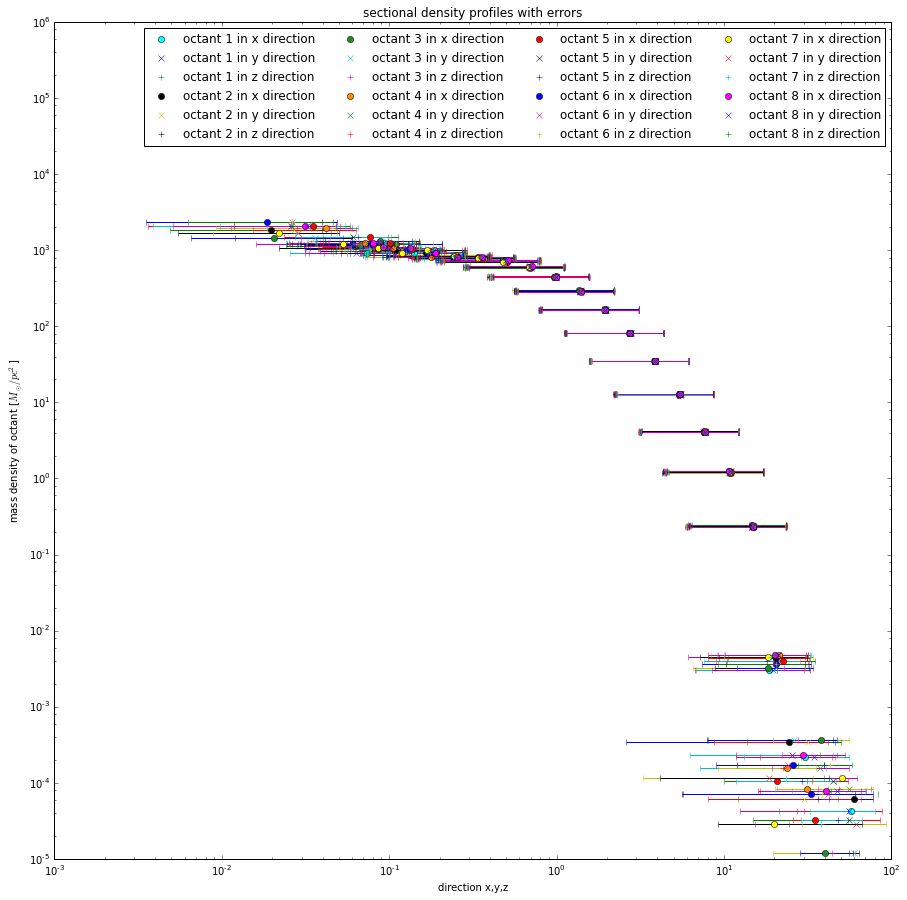

In [28]:
#error in r direction = size of bin
#same with errorbars in x,y,z directions
plt.figure(figsize=(15,15))
for k in range(8):
    if k==0:
        octa=oct1
    elif k==1:
        octa=oct2
    elif k==2:
        octa=oct3
    elif k==3:
        octa=oct4
    elif k==4:
        octa=oct5
    elif k==5:
        octa=oct6
    elif k==6:
        octa=oct7
    elif k==7:
        octa=oct8
    
    x_neu=np.zeros(step)
    x_err=np.zeros(step)
    y_neu=np.zeros(step)
    y_err=np.zeros(step)
    z_neu=np.zeros(step)
    z_err=np.zeros(step)
    M=np.zeros(step)
    rho=np.zeros(step)
    
    for n in range(step):
        inbin=(r_i[n]<r_3d_new)*(r_3d_new<=r_a[n])
        M[n]=np.sum(m1[inbin*octa])+np.sum(m2[inbin*octa])
        rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
        x_neu[n]=np.mean(x_new[inbin*octa])
        x_err[n]=np.std(x_new[inbin*octa])
        y_neu[n]=np.mean(y_new[inbin*octa])
        y_err[n]=np.std(y_new[inbin*octa])
        z_neu[n]=np.mean(z_new[inbin*octa])
        z_err[n]=np.std(z_new[inbin*octa])
        
    M_extra=np.sum(m1[r_anf*octa])+np.sum(m2[r_anf*octa])
    rho_extra=M_extra/(r0**2*np.pi)
    x_extra=np.mean(x_new[r_anf*octa])
    x_err_extra=np.std(x_new[r_anf*octa])
    y_extra=np.mean(y_new[r_anf*octa])
    y_err_extra=np.std(y_new[r_anf*octa])
    z_extra=np.mean(z_new[r_anf*octa])
    z_err_extra=np.std(z_new[r_anf*octa])
    
    M_final=np.insert(M,0,M_extra)
    rho_final=np.insert(rho,0,rho_extra)
    x_final=np.insert(x_neu,0,x_extra)
    x_err_final=np.insert(x_err,0,x_err_extra)
    y_final=np.insert(y_neu,0,y_extra)
    y_err_final=np.insert(y_err,0,y_err_extra)
    z_final=np.insert(z_neu,0,z_extra)
    z_err_final=np.insert(z_err,0,z_err_extra)
    
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta']

    plt.loglog(np.abs(x_final),rho_final,color=colors[k],marker='o',linestyle='None',label='octant '+str(k+1)+" in x direction")
    plt.loglog(np.abs(y_final),rho_final,c=colors[k],marker='x',linestyle='None',label='octant '+str(k+1)+" in y direction")
    plt.loglog(np.abs(z_final),rho_final,c=colors[k],marker='+',linestyle='None',label='octant '+str(k+1)+" in z direction")
    plt.errorbar(np.abs(x_final),rho_final,yerr=None,xerr=x_err_final,c=colors[k],fmt='',linestyle='None')
    plt.errorbar(np.abs(y_final),rho_final,yerr=None,xerr=y_err_final,c=colors[k],fmt='',linestyle='None')
    plt.errorbar(np.abs(z_final),rho_final,yerr=None,xerr=z_err_final,c=colors[k],fmt='',linestyle='None')
    plt.xlabel('direction x,y,z')
    plt.ylabel('mass density of octant [$M_\odot/pc^2$]')
    plt.title('sectional density profiles with errors')
    plt.legend(ncol=4,numpoints=1)

center = center of coordinate system
--

In [11]:
#creating arrays for positive and negative values of x y z distances
x_pos=np.ma.getmask(np.ma.masked_greater_equal(x, 0))
x_neg=np.ma.getmask(np.ma.masked_less_equal(x, 0))
y_pos=np.ma.getmask(np.ma.masked_greater_equal(y, 0))
y_neg=np.ma.getmask(np.ma.masked_less_equal(y, 0))
z_pos=np.ma.getmask(np.ma.masked_greater_equal(z, 0))
z_neg=np.ma.getmask(np.ma.masked_less_equal(z, 0))

#splitting in octants
oct1=x_pos*y_pos*z_pos
oct2=x_neg*y_pos*z_pos
oct3=x_neg*y_neg*z_pos
oct4=x_pos*y_neg*z_pos
oct5=x_pos*y_pos*z_neg
oct6=x_neg*y_pos*z_neg
oct7=x_neg*y_neg*z_neg
oct8=x_pos*y_neg*z_neg

r0=0.1
step=20
end=105
stepsize=((np.log10(end)-np.log10(r0))/step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_anf=r_3d<r0
r_i=r[:-1:]
r_a=r[1::]

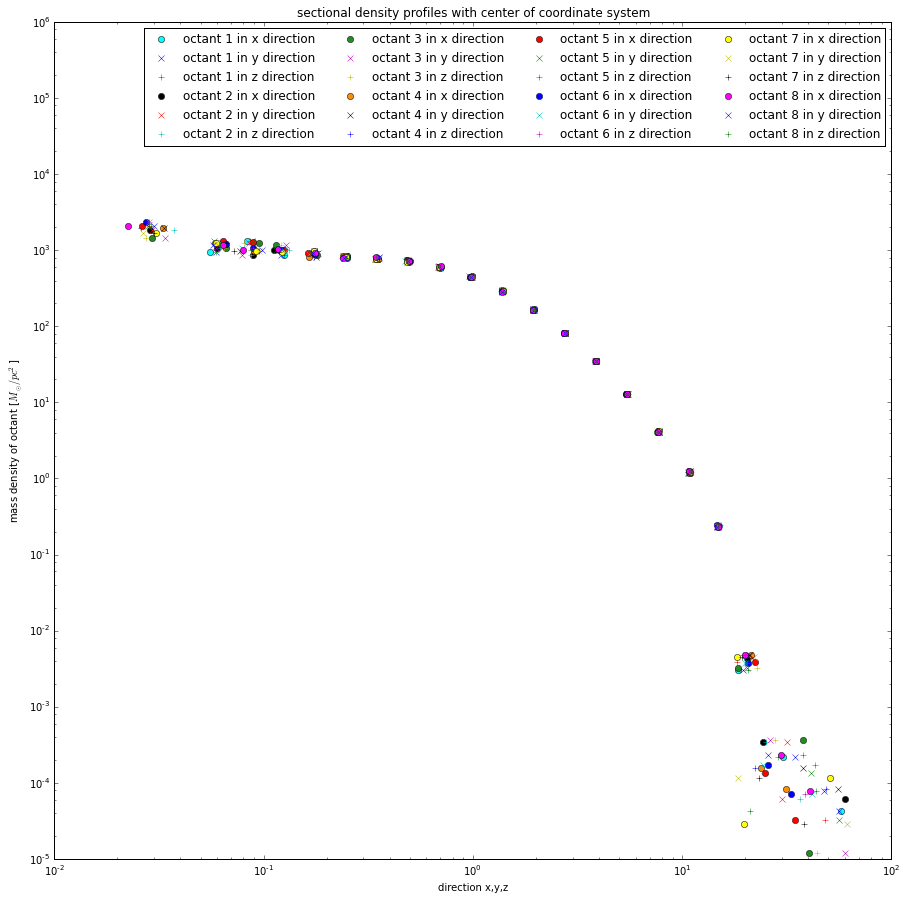

In [30]:
plt.figure(figsize=(15,15))
for k in range(8): #choose a different octant for every k
    if k==0:
        octa=oct1
    elif k==1:
        octa=oct2
    elif k==2:
        octa=oct3
    elif k==3:
        octa=oct4
    elif k==4:
        octa=oct5
    elif k==5:
        octa=oct6
    elif k==6:
        octa=oct7
    elif k==7:
        octa=oct8
    
    x_neu=np.zeros(step) #creates x,y,z,M,rho arrays 
    y_neu=np.zeros(step)
    z_neu=np.zeros(step)
    M=np.zeros(step)
    rho=np.zeros(step)
    
    for n in range(step): #binning
        inbin=(r_i[n]<r_3d)*(r_3d<=r_a[n]) #checks if distance is inside range of bin
        M[n]=np.sum(m1[inbin*octa])+np.sum(m2[inbin*octa]) #sums up masses of stars in bin and octant
        rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates mass density
        x_neu[n]=np.mean(x[inbin*octa]) #calculates mean distance in x direction of stars in bin and octant
        y_neu[n]=np.mean(y[inbin*octa])
        z_neu[n]=np.mean(z[inbin*octa])
        
    M_extra=np.sum(m1[r_anf*octa])+np.sum(m2[r_anf*octa]) #sums up mass of stars which distances are less than first binning distance
    rho_extra=M_extra/(r0**2*np.pi) #calculates mass density for these stars
    x_extra=np.mean(x[r_anf*octa]) #calculates mean distance in x direction of these stars
    y_extra=np.mean(y[r_anf*octa])
    z_extra=np.mean(z[r_anf*octa])
    
    M_final=np.insert(M,0,M_extra) 
    rho_final=np.insert(rho,0,rho_extra)
    x_final=np.insert(x_neu,0,x_extra)
    y_final=np.insert(y_neu,0,y_extra)
    z_final=np.insert(z_neu,0,z_extra)
    
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta'] #since there are 7(without white) standard colors we need at least one extra color

    #plots density profiles of all directions and octants in one plot, different markers for different directions
    plt.loglog(np.abs(x_final),rho_final,color=colors[k],marker='o',linestyle='None',label='octant '+str(k+1)+" in x direction")
    plt.loglog(np.abs(y_final),rho_final,c=colors[k],marker='x',linestyle='None',label='octant '+str(k+1)+" in y direction")
    plt.loglog(np.abs(z_final),rho_final,c=colors[k],marker='+',linestyle='None',label='octant '+str(k+1)+" in z direction")
    plt.xlabel('direction x,y,z')
    plt.ylabel('mass density of octant [$M_\odot/pc^2$]')
    plt.title('sectional density profiles with center of coordinate system')
    plt.legend(ncol=4,numpoints=1)

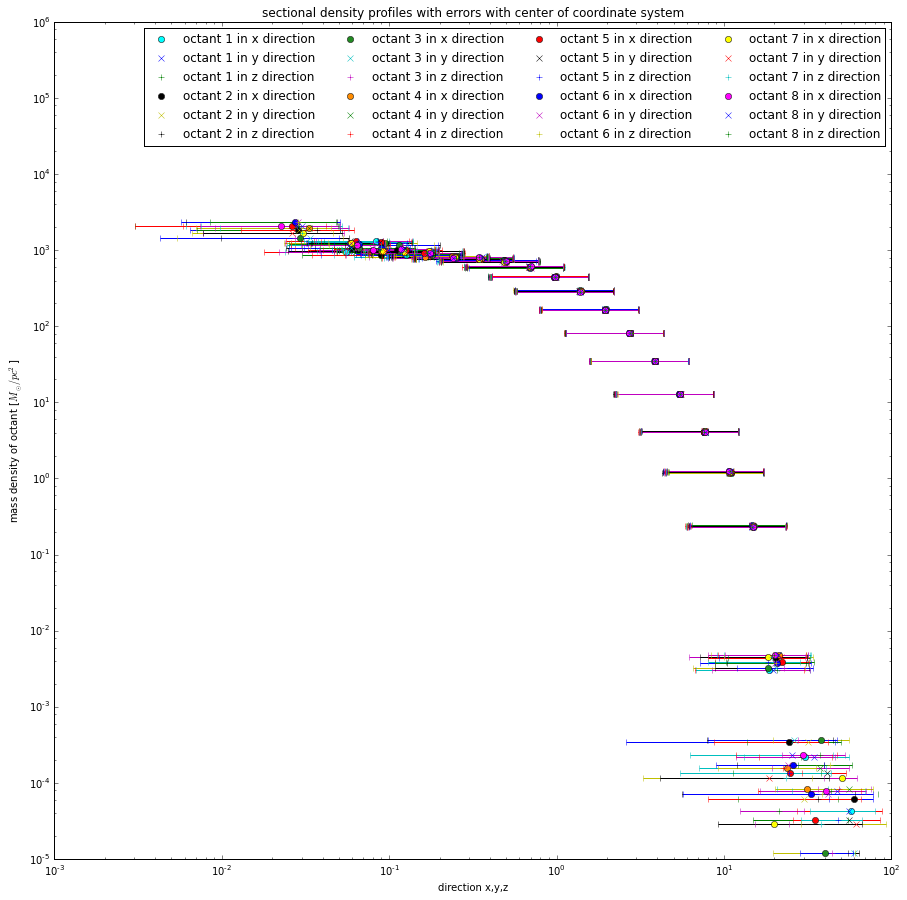

In [31]:
#same with errorbars in x,y,z directions
plt.figure(figsize=(15,15))
for k in range(8):
    if k==0:
        octa=oct1
    elif k==1:
        octa=oct2
    elif k==2:
        octa=oct3
    elif k==3:
        octa=oct4
    elif k==4:
        octa=oct5
    elif k==5:
        octa=oct6
    elif k==6:
        octa=oct7
    elif k==7:
        octa=oct8
    
    x_neu=np.zeros(step)
    x_err=np.zeros(step)
    y_neu=np.zeros(step)
    y_err=np.zeros(step)
    z_neu=np.zeros(step)
    z_err=np.zeros(step)
    M=np.zeros(step)
    rho=np.zeros(step)
    
    for n in range(step):
        inbin=(r_i[n]<r_3d)*(r_3d<=r_a[n])
        M[n]=np.sum(m1[inbin*octa])+np.sum(m2[inbin*octa])
        rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
        x_neu[n]=np.mean(x[inbin*octa])
        x_err[n]=np.std(x[inbin*octa])
        y_neu[n]=np.mean(y[inbin*octa])
        y_err[n]=np.std(y[inbin*octa])
        z_neu[n]=np.mean(z[inbin*octa])
        z_err[n]=np.std(z[inbin*octa])
        
    M_extra=np.sum(m1[r_anf*octa])+np.sum(m2[r_anf*octa])
    rho_extra=M_extra/(r0**2*np.pi)
    x_extra=np.mean(x[r_anf*octa])
    x_err_extra=np.std(x[r_anf*octa])
    y_extra=np.mean(y[r_anf*octa])
    y_err_extra=np.std(y[r_anf*octa])
    z_extra=np.mean(z[r_anf*octa])
    z_err_extra=np.std(z[r_anf*octa])
    
    M_final=np.insert(M,0,M_extra)
    rho_final=np.insert(rho,0,rho_extra)
    x_final=np.insert(x_neu,0,x_extra)
    x_err_final=np.insert(x_err,0,x_err_extra)
    y_final=np.insert(y_neu,0,y_extra)
    y_err_final=np.insert(y_err,0,y_err_extra)
    z_final=np.insert(z_neu,0,z_extra)
    z_err_final=np.insert(z_err,0,z_err_extra)
    
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta']

    plt.loglog(np.abs(x_final),rho_final,color=colors[k],marker='o',linestyle='None',label='octant '+str(k+1)+" in x direction")
    plt.loglog(np.abs(y_final),rho_final,c=colors[k],marker='x',linestyle='None',label='octant '+str(k+1)+" in y direction")
    plt.loglog(np.abs(z_final),rho_final,c=colors[k],marker='+',linestyle='None',label='octant '+str(k+1)+" in z direction")
    plt.errorbar(np.abs(x_final),rho_final,yerr=None,xerr=x_err_final,c=colors[k],fmt='',linestyle='None')
    plt.errorbar(np.abs(y_final),rho_final,yerr=None,xerr=y_err_final,c=colors[k],fmt='',linestyle='None')
    plt.errorbar(np.abs(z_final),rho_final,yerr=None,xerr=z_err_final,c=colors[k],fmt='',linestyle='None')
    plt.xlabel('direction x,y,z')
    plt.ylabel('mass density of octant [$M_\odot/pc^2$]')
    plt.title('sectional density profiles with errors with center of coordinate system')
    plt.legend(ncol=4,numpoints=1)